In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Soil_Type               800 non-null    object 
 1   Crop                    800 non-null    object 
 2   Rainfall_mm             800 non-null    float64
 3   Temperature_Celsius     800 non-null    float64
 4   Fertilizer_Used         800 non-null    bool   
 5   Irrigation_Used         800 non-null    bool   
 6   Weather_Condition       800 non-null    object 
 7   Days_to_Harvest         800 non-null    int64  
 8   Yield_tons_per_hectare  800 non-null    float64
dtypes: bool(2), float64(3), int64(1), object(3)
memory usage: 45.4+ KB
None

Cuplikan Data (Cek Angka Desimal):


,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


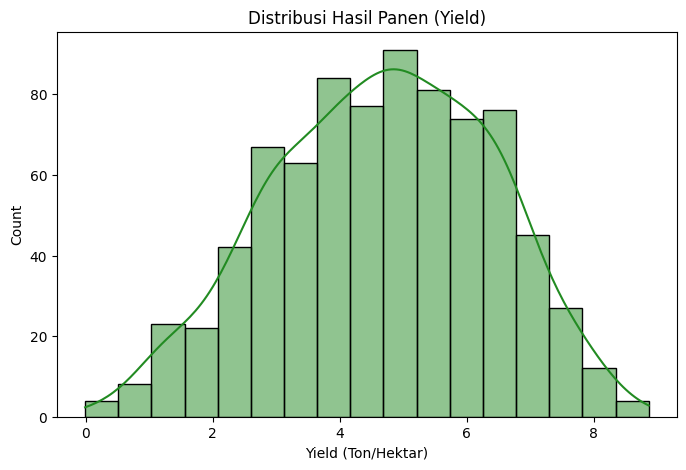

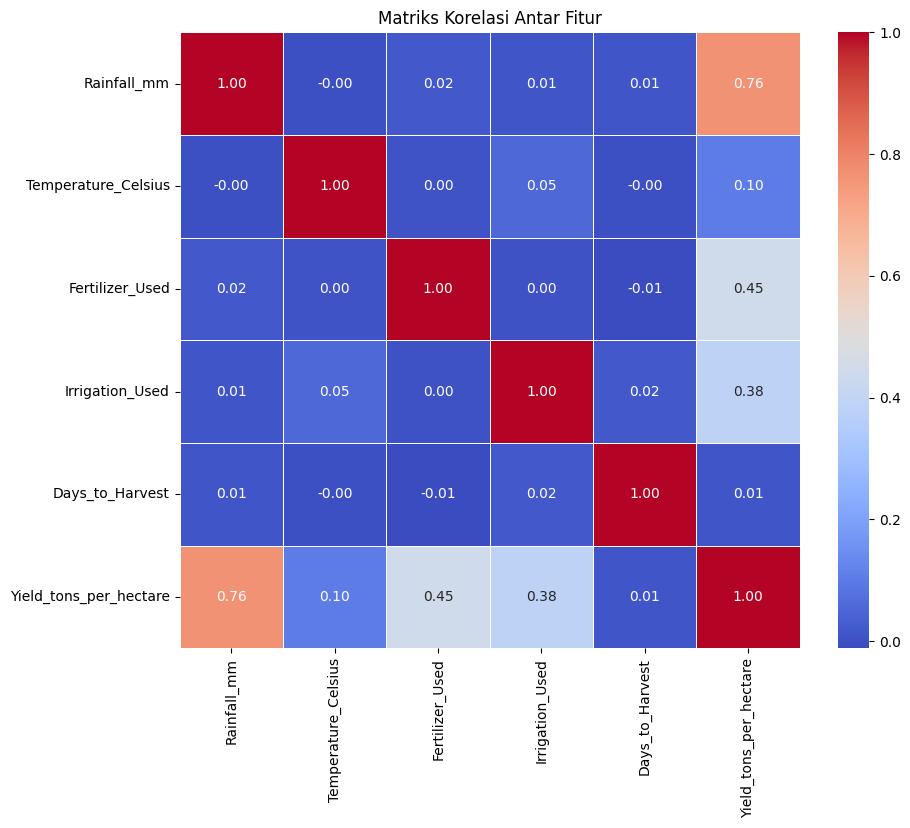

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19280\1802486946.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crop', y='Yield_tons_per_hectare', data=df, ax=axes[0], palette='viridis', errorbar=None)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19280\1802486946.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather_Condition', y='Yield_tons_per_hectare', data=df, ax=axes[1], palette='Set2')


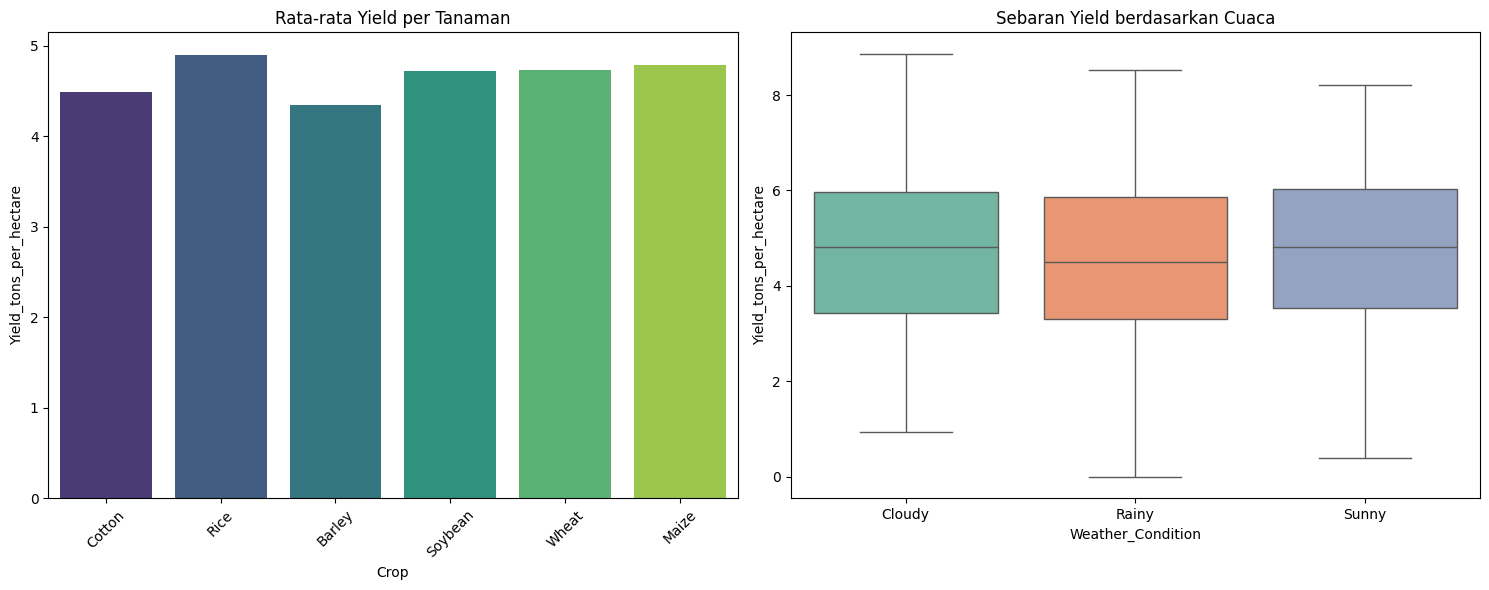

In [2]:
# ==========================================
# 1. LOAD DATASET (Format Indonesia)
# ==========================================
# Menambahkan parameter sep=';' dan decimal=',' agar Python tidak bingung membaca file dataset.
df = pd.read_csv('../data/dataset_800.csv', sep=';', decimal=',')

# Cek apakah dataset sudah terbaca dengan benar
print("Info Data:")
print(df.info())

print("\nCuplikan Data (Cek Angka Desimal):")
display(df.head())

# ==========================================
# 2. EDA: ANALISIS TARGET (YIELD)
# ==========================================
plt.figure(figsize=(8, 5))
sns.histplot(df['Yield_tons_per_hectare'], kde=True, color='forestgreen')
plt.title('Distribusi Hasil Panen (Yield)')
plt.xlabel('Yield (Ton/Hektar)')
plt.show()

# ==========================================
# 3. EDA: KORELASI FITUR (HEATMAP)
# ==========================================
plt.figure(figsize=(10, 8))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi Antar Fitur')
plt.show()

# ==========================================
# 4. EDA: ANALISIS CUACA & TANAMAN
# ==========================================
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Grafik 1: Yield vs Tanaman
sns.barplot(x='Crop', y='Yield_tons_per_hectare', data=df, ax=axes[0], palette='viridis', errorbar=None)
axes[0].set_title('Rata-rata Yield per Tanaman')
axes[0].tick_params(axis='x', rotation=45)

# Grafik 2: Yield vs Cuaca
sns.boxplot(x='Weather_Condition', y='Yield_tons_per_hectare', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Sebaran Yield berdasarkan Cuaca')

plt.tight_layout()
plt.show()